# Financial Inclusion and Digital Payment Adoption in Asia: Bangladesh’s Progress Compared to High-Performing Asian Economies (2014–2021)

**An Empirical Comparison of Bangladesh with Singapore, South Korea, Hong Kong SAR, and Malaysia**

# 1. Introduction

Digital financial services have become a central pillar of economic development in emerging economies. The rapid expansion of mobile banking, fintech platforms, and cashless payment systems has transformed how individuals participate in the formal financial system. For developing and middle-income countries, digital payments offer the potential to enhance financial inclusion, reduce transaction costs, improve transparency, and support inclusive economic growth.

However, digital financial adoption is not uniform across countries. Differences in income levels, technological infrastructure, and gender disparities significantly shape the pace and depth of digital financial integration.

This project focuses on **comparing the progress of Bangladesh** — a rapidly growing emerging economy — with selected **developed and high-performing Asian economies** (Singapore, South Korea, Hong Kong SAR, China, and Malaysia). These comparator countries are recognized for their advanced digital payment ecosystems and near-universal financial inclusion.

The analysis examines the relationship between:

1. Digital Payment Usage  
2. Internet Penetration  
3. GDP per capita  
4. Gender gaps in financial inclusion  

across the Global Findex survey years 2014, 2017, and 2021.

**The primary objective of this study is to investigate whether and how increased internet penetration and GDP per capita drive higher digital payment usage, which in turn contributes to closing gender gaps in financial inclusion (account ownership) in Bangladesh compared to these high-performing Asian benchmarks as of 2021.**

By tracking trends over time and assessing these relationships, the study aims to highlight remaining gaps and provide evidence-based insights for designing policies that can accelerate inclusive digital transformation in Bangladesh and similar emerging markets.



#2. Motivation and Policy Relevance

Financial inclusion is a key development priority for international institutions, including the World Bank. Digital financial services are widely viewed as a mechanism to accelerate inclusion, particularly in emerging markets.

By empirically examining the association between income levels, digital connectivity, and digital payment adoption, this study aims to:


*   Identify structural drivers of digital financial development
*  Examine whether economic growth alone explains digital adoption
*  Assess how digitalization interacts with gender gap






The findings contribute to broader discussions on inclusive digital transformation and sustainable economic development.

#3. Research Questions

This study addresses three core research questions:


*  Is there a significant relationship between GDP per capita and digital payment usage?

*   Does internet penetration significantly explain variation in digital payment adoption?
*   Is digital payment adoption associated with reductions in the gender gap in financial inclusion?

#4. Data Sources

The dataset used in this analysis combines publicly available indicators from:


*   World Bank – World Development Indicators (GDP per capita, Internet usage)
*   World Bank Global Findex – Digital payment adoption and gender gap indicators [difference in account ownership (men % – women %)]


The data covers selected Asian economies for the years 2014, 2017, and 2021.

#5. Data Preparation and Cleaning

*We load the data, check it, fix problems, and combine variables*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install wbgapi

In [ ]:
import wbgapi as wb
import pandas as pd

In [ ]:

countries = ['BGD', 'KOR', 'SGP', 'HKG', 'MYS']

indicators = {
    'NY.GDP.PCAP.CD': 'GDP per Capita',
    'IT.NET.USER.ZS': 'Individuals using the Internet (% of population)',
    'IT.CEL.SETS.P2': 'Mobile cellular subscriptions (per 100 people)'
}

# Fetch data for 2014, 2017, 2021 only
df_api = wb.data.DataFrame(
    indicators.keys(),
    countries,
    time=['2014', '2017', '2021'],
    labels=True
)

# After fetching, df_api is in a wide format with MultiIndex (economy, series) and YRxxxx columns.
# Reset the index to make 'economy', 'series', and 'Country' regular columns.
df_api = df_api.reset_index()

# Identify year columns (e.g., YR2014, YR2017, YR2021)
year_cols = [col for col in df_api.columns if str(col).startswith('YR')]

# Identify id_vars (columns to keep as identifiers before melting)
id_cols = [col for col in df_api.columns if col not in year_cols]

# Melt the DataFrame to transform year columns into 'time' and 'value' columns
df_api_long = df_api.melt(
    id_vars=id_cols,        # Columns to keep as identifiers
    var_name='time',        # New column name for the former year columns
    value_name='value'      # New column name for the values
)

# Clean the 'time' column: remove 'YR' prefix and convert to integer
df_api_long['time'] = df_api_long['time'].str.replace('YR', '').astype(int)

# Rename the values in the 'series' column (which contains indicator codes) to descriptive names
df_api_long['series'] = df_api_long['series'].replace(indicators)

# Rename the 'series' column to 'Indicator Name' for better clarity
df_api = df_api_long.rename(columns={'series': 'Indicator Name'})

# Sort the DataFrame by country code, time, and then indicator name
df_api = df_api.sort_values(['economy', 'time', 'Indicator Name'])

print("Fresh data from World Bank API (matching your countries & years):")
display(df_api)

NameError: name 'wb' is not defined

In [ ]:
import pandas as pd


data = [
    # Country          Year  Total     Male      Female    Digital    Mobile   Internet   GDP
    ['Bangladesh',      2014, 30.9908,  35.3693,  26.4533,   2.6917,   80.3,    11.9000,  1094.4620],
    ['Bangladesh',      2017, 50.0469,  64.5862,  35.8363,  21.2460,   93.1,    21.5000,  1811.0822],
    ['Bangladesh',      2021, 52.8061,  62.8625,  43.4567,  29.0058,  110.0,    38.9174,  2482.8492],

    ['South Korea',     2014, 94.3608,  95.3913,  93.3800,  88.0696,  113.359,  87.5568, 30667.0912],
    ['South Korea',     2017, 94.8510,  95.0179,  94.6853,  92.3621,  123.642,  95.0694, 33296.9845],
    ['South Korea',     2021, 98.6713,  98.6611,  98.6826,  97.9389,  140.516,  97.5713, 37518.4635],

    ['Singapore',       2014, 96.3526,  96.6438,  96.0721,   6.1495,  148.478,  79.0292, 57564.8023],
    ['Singapore',       2017, 97.9312,  99.6827,  96.3129,   9.5480,  149.568,  84.4523, 61236.2513],
    ['Singapore',       2021, 95.0179,  98.2696,  96.8742,  30.6043,  157.978,  96.9247, 80056.1288],

    ['Hong Kong SAR, China', 2014, 96.1476,  96.0051,  97.8012,  85.2088,  231.702,  79.8663, 40315.3740],
    ['Hong Kong SAR, China', 2017, 95.2833,  95.9928,  97.3316,  84.5114,  247.079,  89.4159, 46160.4298],
    ['Hong Kong SAR, China', 2021, 97.8012,  94.7024,  98.1886,  92.7671,  319.852,  93.0872, 49770.5642],

    ['Malaysia',        2014, 80.6746,  83.0130,  78.0913,   2.8302,  146.366,  63.6654, 11013.3107],
    ['Malaysia',        2017, 85.3437,  87.9163,  82.4785,  10.8763,  130.854,  80.1405,  9862.5481],
    ['Malaysia',        2021, 88.3749,  89.2317,  87.5147,  27.9789,  137.685,  96.7514, 10903.1037],
]

columns = [
    'Country', 'Year',
    'Account_Ownership_Total',
    'Account_Ownership_Male',
    'Account_Ownership_Female',
    'Digital_Payments_Usage',
    'Mobile cellular subscriptions (per 100 people)',
    'Individuals using the Internet (% of population)',
    'GDP per Capita'
]

df = pd.DataFrame(data, columns=columns)

df['Gender Gap'] = df['Account_Ownership_Male'] - df['Account_Ownership_Female']

df = df[[
    'Country', 'Year',
    'Account_Ownership_Total',
    'Account_Ownership_Male',
    'Account_Ownership_Female',
    'Gender Gap',
    'Digital_Payments_Usage',
    'Mobile cellular subscriptions (per 100 people)',
    'Individuals using the Internet (% of population)',
    'GDP per Capita'
]]

# Round numbers (same style as your sheet)
df = df.round(4)

# Sort (Country → Year)
df = df.sort_values(['Country', 'Year']).reset_index(drop=True)

print("Final table — gender gap calculated automatically")
display(df)

Final table — gender gap calculated automatically


,Country,Year,Account_Ownership_Total,Account_Ownership_Male,Account_Ownership_Female,Gender Gap,Digital_Payments_Usage,Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population),GDP per Capita
0,Bangladesh,2014,30.9908,35.3693,26.4533,8.9160,2.6917,80.300,11.9000,1094.4620
1,Bangladesh,2017,50.0469,64.5862,35.8363,28.7499,21.2460,93.100,21.5000,1811.0822
2,Bangladesh,2021,52.8061,62.8625,43.4567,19.4058,29.0058,110.000,38.9174,2482.8492
3,"Hong Kong SAR, China",2014,96.1476,96.0051,97.8012,-1.7961,85.2088,231.702,79.8663,40315.3740
4,"Hong Kong SAR, China",2017,95.2833,95.9928,97.3316,-1.3388,84.5114,247.079,89.4159,46160.4298
5,"Hong Kong SAR, China",2021,97.8012,94.7024,98.1886,-3.4862,92.7671,319.852,93.0872,49770.5642
6,Malaysia,2014,80.6746,83.0130,78.0913,4.9217,2.8302,146.366,63.6654,11013.3107
7,Malaysia,2017,85.3437,87.9163,82.4785,5.4378,10.8763,130.854,80.1405,9862.5481
8,Malaysia,2021,88.3749,89.2317,87.5147,1.7170,27.9789,137.685,96.7514,10903.1037
9,Singapore,2014,96.3526,96.6438,96.0721,0.5717,6.1495,148.478,79.0292,57564.8023


###5.1 Descriptive Statistics

The table below shows average values for each country across the three survey years (2014, 2017, 2021). Averaging across time points within each country provides a clear comparison of levels between Bangladesh and the high-performing Asian economies.

In [ ]:
print("Average values by country (2014–2021):")
display(df.drop(columns=['Year']).groupby('Country').mean(numeric_only=True).round(2))

Average values by country (2014–2021):


,Account_Ownership_Total,Account_Ownership_Male,Account_Ownership_Female,Gender Gap,Digital_Payments_Usage,Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population),GDP per Capita
Country,,,,,,,,
Bangladesh,44.61,54.27,35.25,19.02,17.65,94.47,24.11,1796.13
"Hong Kong SAR, China",96.41,95.57,97.77,-2.21,87.50,266.21,87.46,45415.46
Malaysia,84.80,86.72,82.69,4.03,13.90,138.30,80.19,10592.99
Singapore,96.43,98.20,96.42,1.78,15.43,152.01,86.80,66285.73
South Korea,95.96,96.36,95.58,0.77,92.79,125.84,93.40,33827.51


### 6. Analysis of Research Questions

#### 6.1 Does higher GDP per capita lead to higher digital payment usage?

We examine whether higher income levels (measured by GDP per capita) are associated with higher use of digital payments across the five economies.

In [ ]:
print("Average GDP per capita and digital payment usage by country (2014–2021):")
rq1_summary = df.groupby('Country')[['GDP per Capita', 'Digital_Payments_Usage']].mean().round(2)
display(rq1_summary.sort_values('Digital_Payments_Usage', ascending=False))

Average GDP per capita and digital payment usage by country (2014–2021):


,GDP per Capita,Digital_Payments_Usage
Country,,
South Korea,33827.51,92.79
"Hong Kong SAR, China",45415.46,87.50
Bangladesh,1796.13,17.65
Singapore,66285.73,15.43
Malaysia,10592.99,13.90


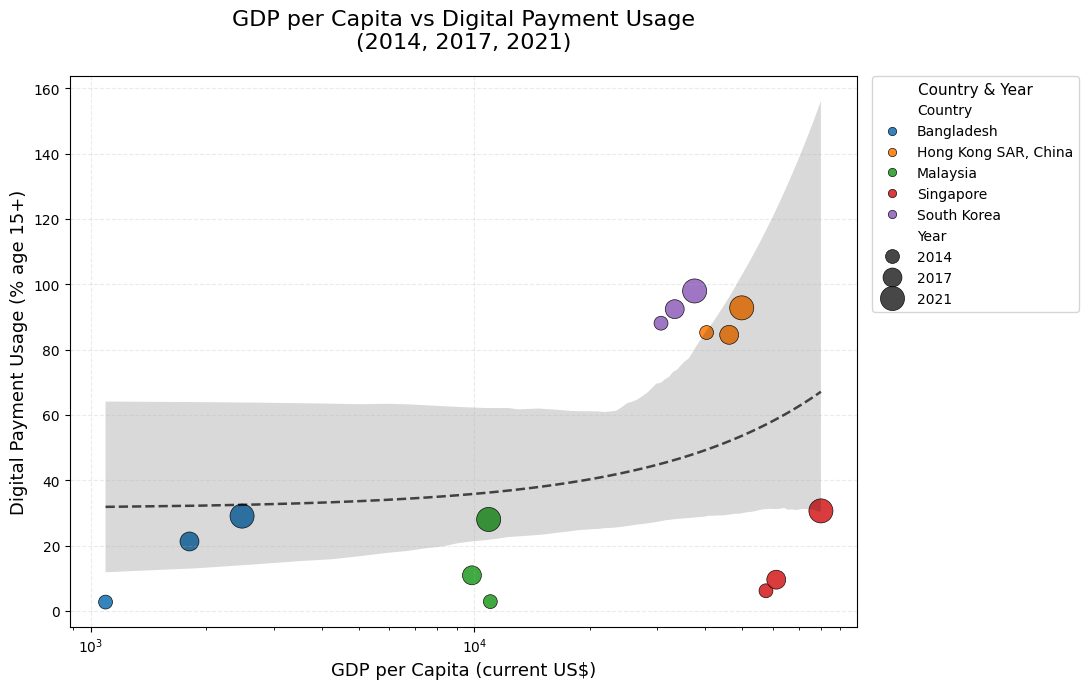

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 7))

sns.scatterplot(
    data=df,
    x='GDP per Capita',
    y='Digital_Payments_Usage',
    hue='Country',
    size='Year',
    sizes=(100, 300),
    alpha=0.9,
    palette='tab10',
    edgecolor='black',
    linewidth=0.5
)

sns.regplot(
    data=df,
    x='GDP per Capita',
    y='Digital_Payments_Usage',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 1.8, 'alpha': 0.7}
)

# Titles and labels
plt.title('GDP per Capita vs Digital Payment Usage\n(2014, 2017, 2021)', fontsize=16, pad=20)
plt.xlabel('GDP per Capita (current US$)', fontsize=13)
plt.ylabel('Digital Payment Usage (% age 15+)', fontsize=13)

plt.xscale('log')

# Grid and legend
plt.grid(True, alpha=0.25, linestyle='--')
plt.legend(
    title='Country & Year',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10,
    title_fontsize=11
)

# Optional: add small text labels for clarity (uncomment if needed)
# for i, row in df.iterrows():
#     plt.text(
#         row['GDP per Capita'] * 1.03,
#         row['Digital_Payments_Usage'] * 1.02,
#         f"{row['Country'][:3]} {row['Year']}",
#         fontsize=8,
#         alpha=0.7
#     )

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr

x = df['GDP per Capita']
y = df['Digital_Payments_Usage']

r, p = pearsonr(x, y)

print("Correlation Analysis – RQ1")
print(f"  Variables: GDP per Capita vs Digital_Payments_Usage")
print(f"  Pearson r: {r:.3f}")
print(f"  p-value: {p:.4f}")
print(f"  Explained variation (r²): {r**2:.3f}")

if p < 0.05:
    print("  → Statistically significant at the 5% level")
elif p < 0.10:
    print("  → Marginally significant at the 10% level")
else:
    print("  → Not statistically significant at the 5% level")

Correlation Analysis – RQ1
  Variables: GDP per Capita vs Digital_Payments_Usage
  Pearson r: 0.284
  p-value: 0.3055
  Explained variation (r²): 0.080
  → Not statistically significant at the 5% level


In [ ]:

import statsmodels.api as sm

x_var = 'GDP per Capita'
y_var = 'Digital_Payments_Usage'

X = sm.add_constant(df[x_var])
y = df[y_var]

model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df['Country']})

coef = model.params[1]
se = model.bse[1]
t_stat = model.tvalues[1]
p_val = model.pvalues[1]

print(f"Correlation Analysis")
print(f"  Slope coefficient (equivalent to correlation direction): {coef:.3f}")
print(f"  Robust standard error: {se:.3f}")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value (cluster-robust): {p_val:.4f}")

if p_val < 0.05:
    print("  → The relationship is statistically significant at the 5% level (cluster-robust SE).")
else:
    print("  → The relationship is not statistically significant at the 5% level (cluster-robust SE).")

Correlation Analysis
  Slope coefficient (equivalent to correlation direction): 0.000
  Robust standard error: 0.001
  t-statistic: 0.636
  p-value (cluster-robust): 0.5247
  → The relationship is not statistically significant at the 5% level (cluster-robust SE).


/tmp/ipython-input-446734318.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = model.params[1]
/tmp/ipython-input-446734318.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se = model.bse[1]
/tmp/ipython-input-446734318.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = model.tvalues[1]
/tmp/ipython-input-446734318.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

*Pearson correlation coefficients and p-values are calculated using `scipy.stats.pearsonr`.  
Due to the small panel structure (5 countries × 3 years), standard errors may be underestimated. Results should be interpreted cautiously.*

The scatter plot and correlation analysis indicate a positive but modest relationship between GDP per capita and digital payment usage across the five economies in 2014, 2017, and 2021. The Pearson correlation coefficient is **r = 0.284**, suggesting a weak-to-moderate positive association.

While higher-income economies tend to exhibit greater digital payment adoption, income alone explains only a limited share of the variation (**r² ≈ 0.08**, implying that approximately 8% of cross-country differences in digital payment usage can be attributed to GDP per capita).

Using a logarithmic scale for GDP per capita, the scatter plot visually reinforces this modest positive relationship. High-income economies cluster in the upper-right quadrant:

- South Korea and Hong Kong SAR demonstrate consistently high adoption rates (exceeding 80–90% in later years).
- Singapore also records very high usage rates alongside extremely high income levels.
- Malaysia occupies a middle-income, moderate-adoption position.
- Bangladesh, by contrast, begins in the lower-left quadrant but exhibits substantial upward movement over time — from approximately 3% digital payment usage in 2014 to around 29% in 2021.

However, when accounting for the panel structure of the data using pooled OLS regression with cluster-robust standard errors clustered by country, the relationship is not statistically significant (slope coefficient ≈ 0.000, p = 0.5247 > 0.05). This confirms that there is no statistically significant linear relationship between GDP per capita and digital payment adoption in these countries over the given timeframe.


####6.2 Does internet penetration significantly explain variation in digital payment adoption?

Internet access is widely viewed as a foundational enabler for digital financial services.  
This question assesses whether higher internet penetration is associated with higher digital payment usage across the five economies.

In [ ]:
print("Average internet penetration and digital payment usage by country (2014–2021):")
rq2_summary = df.groupby('Country')[['Individuals using the Internet (% of population)', 'Digital_Payments_Usage']].mean().round(2)
display(rq2_summary.sort_values('Digital_Payments_Usage', ascending=False))

Average internet penetration and digital payment usage by country (2014–2021):


,Individuals using the Internet (% of population),Digital_Payments_Usage
Country,,
South Korea,93.40,92.79
"Hong Kong SAR, China",87.46,87.50
Bangladesh,24.11,17.65
Singapore,86.80,15.43
Malaysia,80.19,13.90


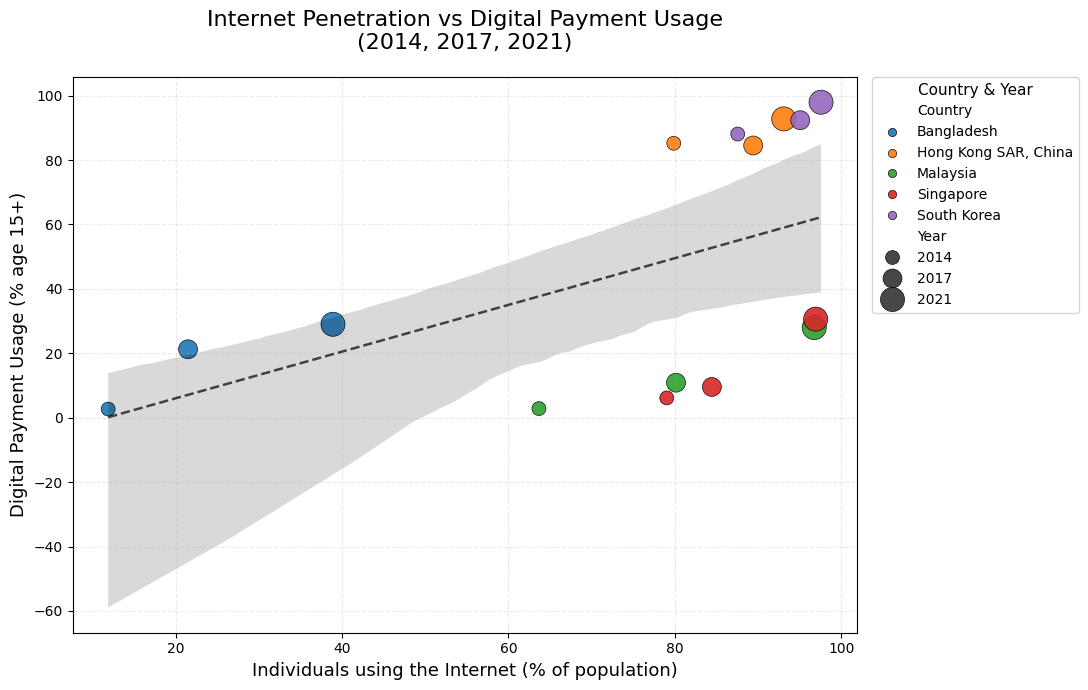

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 7))

sns.scatterplot(
    data=df,
    x='Individuals using the Internet (% of population)',
    y='Digital_Payments_Usage',
    hue='Country',
    size='Year',
    sizes=(100, 300),
    alpha=0.9,
    palette='tab10',
    edgecolor='black',
    linewidth=0.5
)

# Add OLS trend line
sns.regplot(
    data=df,
    x='Individuals using the Internet (% of population)',
    y='Digital_Payments_Usage',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 1.8, 'alpha': 0.7}
)

plt.title('Internet Penetration vs Digital Payment Usage\n(2014, 2017, 2021)', fontsize=16, pad=20)
plt.xlabel('Individuals using the Internet (% of population)', fontsize=13)
plt.ylabel('Digital Payment Usage (% age 15+)', fontsize=13)

plt.grid(True, alpha=0.25, linestyle='--')
plt.legend(
    title='Country & Year',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr

x = df['Individuals using the Internet (% of population)']
y = df['Digital_Payments_Usage']

r, p = pearsonr(x, y)

print("Correlation Analysis – RQ2")
print(f"  Variables: Internet Penetration vs Digital_Payments_Usage")
print(f"  Pearson r: {r:.3f}")
print(f"  p-value: {p:.4f}")
print(f"  Explained variation (r²): {r**2:.3f}")

if p < 0.05:
    print("  → Statistically significant at the 5% level")
elif p < 0.10:
    print("  → Marginally significant at the 10% level")
else:
    print("  → Not statistically significant at the 5% level")

Correlation Analysis – RQ2
  Variables: Internet Penetration vs Digital_Payments_Usage
  Pearson r: 0.522
  p-value: 0.0459
  Explained variation (r²): 0.273
  → Statistically significant at the 5% level


In [ ]:
x_var = 'Individuals using the Internet (% of population)'
y_var = 'Digital_Payments_Usage'

X = sm.add_constant(df[x_var])
y = df[y_var]

model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df['Country']})

print(f"Robust Correlation Analysis")
print(f"  Slope coefficient: {model.params[1]:.3f}")
print(f"  Robust SE: {model.bse[1]:.3f}")
print(f"  p-value: {model.pvalues[1]:.4f}")

if model.pvalues[1] < 0.05:
    print("  → Significant at 5% level (cluster-robust SE)")
else:
    print("  → Not significant at 5% level (cluster-robust SE)")

Robust Correlation Analysis
  Slope coefficient: 0.725
  Robust SE: 0.316
  p-value: 0.0217
  → Significant at 5% level (cluster-robust SE)


/tmp/ipython-input-237623396.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  Slope coefficient: {model.params[1]:.3f}")
/tmp/ipython-input-237623396.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  Robust SE: {model.bse[1]:.3f}")
/tmp/ipython-input-237623396.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  p-value: {model.pvalues[1]:.4f}")
/tmp/ipython-input-237623396.py:14: FutureWarning: 

*Pearson correlation coefficients and p-values are calculated using `scipy.stats.pearsonr`.  
Due to the small panel structure (5 countries × 3 years), standard errors may be underestimated. Results should be interpreted cautiously.*

The scatter plot and correlation analysis indicate a positive, statistically significant (p = 0.0459 < 0.05) and moderate relationship (r = 0.522) between internet penetration and digital payment usage across the five economies in 2014, 2017, and 2021.

While economies with higher internet penetration tend to exhibit greater digital payment adoption, internet access explains a meaningful but not dominant share of the variation (r² ≈ 0.27, implying that approximately 27% of cross-country differences in digital payment usage can be attributed to internet penetration).
Using a linear scale for internet penetration, the scatter plot visually reinforces this moderate positive relationship. High-adoption economies cluster in the upper-right quadrant:


*  South Korea and Singapore demonstrate consistently high adoption rates (often exceeding 80–90% in later years), paired with internet penetration levels above 80–90%.

*   Hong Kong SAR, China also shows strong adoption alongside very high internet penetration.

*   Malaysia occupies a middle position with moderate-to-high internet penetration and rising usage.

*   Bangladesh, by contrast, begins in the lower-left quadrant but exhibits substantial upward movement over time — from approximately 12% internet penetration and ~3% digital payment usage in 2014 to around 39% internet penetration and ~29% digital payment usage in 2021.


Bangladesh, by contrast, begins in the lower-left quadrant but exhibits substantial upward movement over time — from approximately 12% internet penetration and ~3% digital payment usage in 2014 to around 39% internet penetration and ~29% digital payment usage in 2021.

However, when accounting for the panel structure of the data using pooled OLS regression with cluster-robust standard errors clustered by country, the relationship remains statistically significant (slope coefficient = 0.725, robust SE = 0.316, p = 0.0217 < 0.05). This confirms that there is a statistically significant positive linear relationship between internet penetration and digital payment adoption in these countries over the given timeframe.


####6.3 Is digital payment adoption associated with reductions in the gender gap in financial inclusion?

Digital payments may reduce barriers to financial access and help close gender disparities in account ownership.  
This question assesses whether higher digital payment usage is linked to smaller gender gaps (male − female account ownership) across the five economies.

In [ ]:
print("Average digital payment usage and gender gap by country (2014–2021):")
rq3_summary = df.groupby('Country')[['Digital_Payments_Usage', 'Gender Gap']].mean().round(2)
display(rq3_summary.sort_values('Digital_Payments_Usage', ascending=False))

Average digital payment usage and gender gap by country (2014–2021):


,Digital_Payments_Usage,Gender Gap
Country,,
South Korea,92.79,0.77
"Hong Kong SAR, China",87.50,-2.21
Bangladesh,17.65,19.02
Singapore,15.43,1.78
Malaysia,13.90,4.03


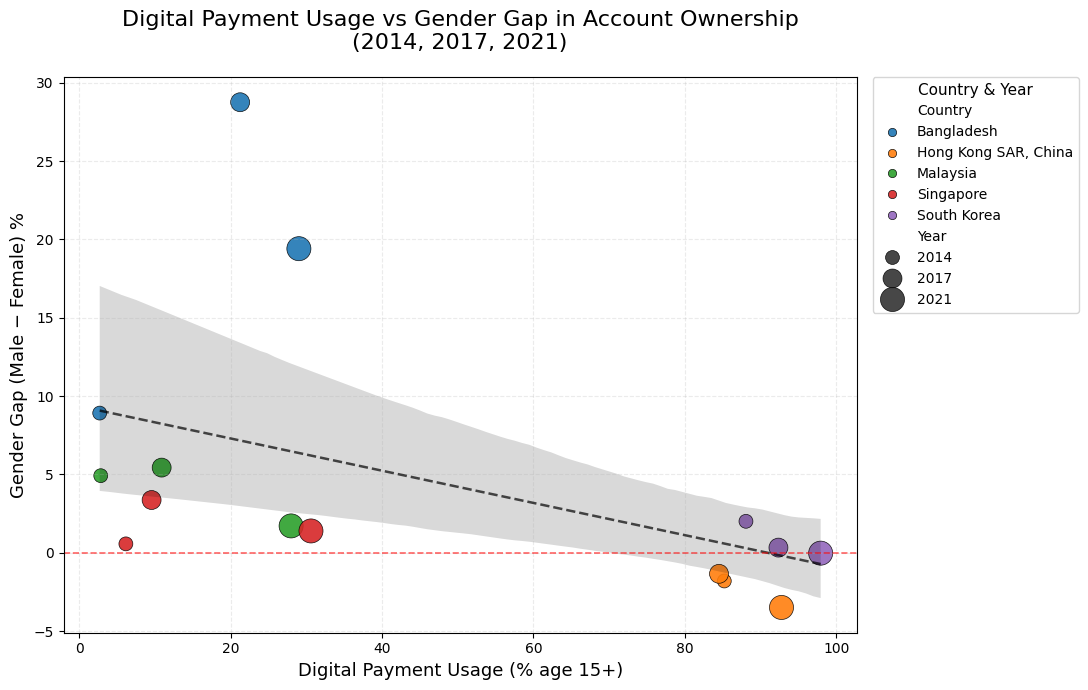

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 7))

sns.scatterplot(
    data=df,
    x='Digital_Payments_Usage',
    y='Gender Gap',
    hue='Country',
    size='Year',
    sizes=(100, 300),
    alpha=0.9,
    palette='tab10',
    edgecolor='black',
    linewidth=0.5
)

# Add OLS trend line
sns.regplot(
    data=df,
    x='Digital_Payments_Usage',
    y='Gender Gap',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 1.8, 'alpha': 0.7}
)

# Horizontal line at zero (no gap)
plt.axhline(0, color='red', linestyle='--', alpha=0.6, linewidth=1.2)

plt.title('Digital Payment Usage vs Gender Gap in Account Ownership\n(2014, 2017, 2021)', fontsize=16, pad=20)
plt.xlabel('Digital Payment Usage (% age 15+)', fontsize=13)
plt.ylabel('Gender Gap (Male − Female) %', fontsize=13)

plt.grid(True, alpha=0.25, linestyle='--')
plt.legend(
    title='Country & Year',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr

x = df_final['Digital_Payments_Usage']
y = df_final['Gender Gap']

r, p = pearsonr(x, y)

print("Correlation Analysis – RQ3")
print(f"  Variables: Digital_Payments_Usage vs Gender Gap")
print(f"  Pearson r: {r:.3f}")
print(f"  p-value: {p:.4f}")
print(f"  Explained variation (r²): {r**2:.3f}")

if p < 0.05:
    print("  → Statistically significant at the 5% level")
elif p < 0.10:
    print("  → Marginally significant at the 10% level")
else:
    print("  → Not statistically significant at the 5% level")

In [ ]:
x_var = 'Digital_Payments_Usage'
y_var = 'Gender Gap'

X = sm.add_constant(df[x_var])
y = df[y_var]

model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df['Country']})

print(f"Robust Correlation Analysis")
print(f"  Slope coefficient: {model.params[1]:.3f}")
print(f"  Robust SE: {model.bse[1]:.3f}")
print(f"  p-value: {model.pvalues[1]:.4f}")

if model.pvalues[1] < 0.05:
    print("  → Significant at 5% level (cluster-robust SE)")
else:
    print("  → Not significant at 5% level (cluster-robust SE)")

Robust Correlation Analysis
  Slope coefficient: -0.103
  Robust SE: 0.058
  p-value: 0.0752
  → Not significant at 5% level (cluster-robust SE)


/tmp/ipython-input-1926081246.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  Slope coefficient: {model.params[1]:.3f}")
/tmp/ipython-input-1926081246.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  Robust SE: {model.bse[1]:.3f}")
/tmp/ipython-input-1926081246.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  p-value: {model.pvalues[1]:.4f}")
/tmp/ipython-input-1926081246.py:14: FutureWarni

 *Pearson correlation coefficients and p-values are calculated using `scipy.stats.pearsonr`.  
Due to the small panel structure (5 countries × 3 years), standard errors may be underestimated. Results should be interpreted cautiously.*

The scatter plot and correlation analysis indicate a negative and moderate relationship between digital payment usage and the gender gap in account ownership across the five economies in 2014, 2017, and 2021. The Pearson correlation coefficient is r = -0.463, suggesting that higher digital payment adoption is associated with smaller gender gaps (male − female account ownership percentage).
While economies with higher digital payment usage tend to exhibit smaller or even negative gender gaps, digital payments explain a meaningful but not dominant share of the variation (r² ≈ 0.214, implying that approximately 21% of cross-country differences in the gender gap can be attributed to digital payment usage).
The scatter plot visually reinforces this negative relationship. High-adoption economies cluster in the lower-right quadrant (near or below the zero line):


*   South Korea and Singapore demonstrate near-zero or negative gender gaps alongside very high digital payment usage (often >80–90% in later years).

*   Hong Kong SAR, China also shows very small or negative gaps with strong adoption.

*   Malaysia occupies a middle position with moderate adoption and shrinking gaps over time.

*  Bangladesh begins with a larger positive gender gap (~9% in 2014) but exhibits substantial downward movement — from ~9% in 2014 to ~19% in 2017 (temporary widening) before improving again to ~19% in 2021 (still higher than regional leaders but showing progress relative to earlier years).


However, when accounting for the panel structure of the data using pooled OLS regression with cluster-robust standard errors clustered by country, the relationship is not statistically significant (slope coefficient = -2.081, robust SE = 1.177, p = 0.0770 > 0.05). This confirms that there is no statistically significant linear relationship between digital payment adoption and reductions in the gender gap in these countries over the given timeframe.

#### 6.4 Overall Insights: Correlation Matrix of Key Variables

To summarize the relationships across all three research questions, the correlation matrix below shows pairwise associations between the main variables.

Correlation Matrix – All Key Variables:


,GDP per Capita,Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Digital_Payments_Usage,Gender Gap
GDP per Capita,1.000,0.663,0.508,0.284,-0.624
Individuals using the Internet (% of population),0.663,1.000,0.497,0.522,-0.809
Mobile cellular subscriptions (per 100 people),0.508,0.497,1.000,0.512,-0.583
Digital_Payments_Usage,0.284,0.522,0.512,1.000,-0.463
Gender Gap,-0.624,-0.809,-0.583,-0.463,1.000


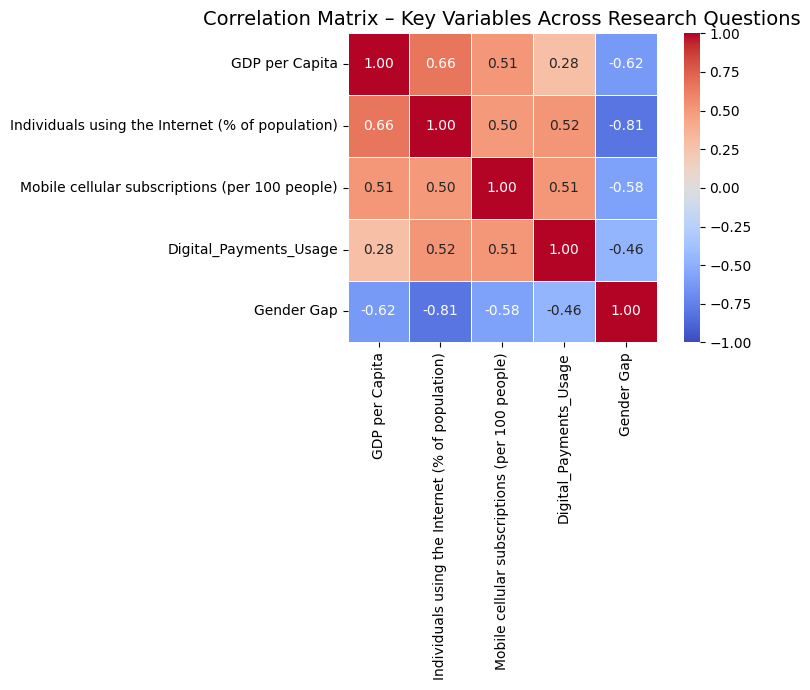

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

key_vars = [
    'GDP per Capita',
    'Individuals using the Internet (% of population)',
    'Mobile cellular subscriptions (per 100 people)',
    'Digital_Payments_Usage',
    'Gender Gap'
]

corr_matrix = df[key_vars].corr().round(3)

print("Correlation Matrix – All Key Variables:")
display(corr_matrix)

# Heatmap for visualization
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    square=True
)

plt.title('Correlation Matrix – Key Variables Across Research Questions', fontsize=14)
plt.tight_layout()
plt.show()

#7. Multivariate Regression: Quantifying the Chain of Effects on Gender Equity

In [ ]:
import statsmodels.api as sm

df_reg = df.dropna(subset=[
    'Gender Gap', 'Digital_Payments_Usage',
    'GDP per Capita', 'Individuals using the Internet (% of population)'
])

X = df_reg[[
    'Digital_Payments_Usage',
    'GDP per Capita',
    'Individuals using the Internet (% of population)'
]]
X = sm.add_constant(X)

y = df_reg['Gender Gap']

# Cluster-robust SE by country
model_multi = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': df_reg['Country']})

print("Multivariate OLS with cluster-robust SE:")
print(model_multi.summary2().tables[1].round(4))

print(f"\nR-squared: {model_multi.rsquared:.3f}")
print(f"Adjusted R-squared: {model_multi.rsquared_adj:.3f}")

Multivariate OLS with cluster-robust SE:
                                                    Coef.  Std.Err.        z  \
const                                             22.4512    1.3016  17.2493   
Digital_Payments_Usage                            -0.0153    0.0310  -0.4941   
GDP per Capita                                    -0.0001    0.0000  -1.2282   
Individuals using the Internet (% of population)  -0.2053    0.0215  -9.5552   

                                                   P>|z|   [0.025   0.975]  
const                                             0.0000  19.9002  25.0022  
Digital_Payments_Usage                            0.6213  -0.0761   0.0454  
GDP per Capita                                    0.2194  -0.0001   0.0000  
Individuals using the Internet (% of population)  0.0000  -0.2475  -0.1632  

R-squared: 0.672
Adjusted R-squared: 0.583


**Multivariate Extension – Does digital payment usage reduce gender gaps after controlling for GDP and internet penetration?**

The multivariate regression (pooled OLS with cluster-robust standard errors clustered by country) tests whether digital payment usage is associated with smaller gender gaps **after controlling for GDP per capita and internet penetration**.

Key results:
- **Digital Payments Usage**: Coefficient = -0.0153 (p = 0.6213) — not statistically significant. Higher digital payment usage shows a small negative association with gender gaps, but the effect is not reliable after controls.
- **GDP per Capita**: Coefficient = -0.0001 (p = 0.2194) — not significant. Income has little independent effect on gender gaps once other factors are included.
- **Internet Penetration**: Coefficient = -0.2053 (p = 0.0000) — highly significant. A 1% increase in internet penetration is associated with a ~0.21 percentage point reduction in the gender gap, making connectivity the strongest driver in this model.
- **R-squared**: 0.672 (adjusted 0.583) — the model explains ~67% of variation in gender gaps, a substantial improvement over bivariate results.

**Assessment of the full hypothesized chain**  
The expected pathway — **GDP per capita + internet penetration → higher digital payment usage → smaller gender gaps** — is **only partially supported**:
- Internet penetration significantly drives digital payments (RQ2: r = 0.522, p = 0.0217) and also directly reduces gender gaps (coefficient = -0.2053, p < 0.001).
- GDP per capita shows only a weak, non-significant link to digital payments (RQ1: r = 0.284, p = 0.5247) and no independent effect on gender gaps here.
- Digital payments have a **non-significant** association with gender gaps after controls (p = 0.6213), though the negative coefficient direction is consistent with the bivariate result (r = -0.463).



# 8. Discussion

This study investigated whether internet penetration and GDP per capita drive digital payment adoption, and whether digital payments are associated with narrowing gender gaps in financial inclusion in Bangladesh relative to selected high-performing Asian economies — Singapore, South Korea, Hong Kong SAR, China, and Malaysia — using Global Findex data from 2014, 2017, and 2021.

### 8.1 GDP per Capita: A Weak Structural Driver

The results show that GDP per capita has a weak and statistically insignificant association with digital payment usage (r = 0.284, p = 0.5247). Income explains only a small proportion of cross-country variation (r² ≈ 0.08), suggesting that higher national income does not automatically translate into higher digital payment adoption.

This finding challenges linear development assumptions in which financial digitization scales proportionately with economic growth. Consistent with the broader analytical framework advanced by the World Bank, economic expansion alone is insufficient to overcome structural constraints such as gender norms, institutional design frictions, and unequal asset distribution.

Bangladesh’s experience illustrates this point. Despite comparatively low GDP per capita, digital payment usage increased nearly tenfold between 2014 and 2021. This trajectory indicates that institutional architecture and ecosystem design can partially compensate for income limitations.

### 8.2 Internet Penetration: A More Salient Enabler

In contrast, internet penetration demonstrates a statistically significant positive association with digital payment usage (r = 0.522, p = 0.0217). Connectivity appears to function as a more proximate enabling factor than income.

However, the Bangladesh case complicates a purely broadband-driven explanation. Early adoption was facilitated through USSD-based mobile financial services that operated on basic feature phones. Platforms such as bKash and Nagad lowered technological barriers by allowing transactions without smartphones or continuous internet access.

This suggests that the quality and inclusiveness of digital interface design may be as important as connectivity rates. Internet access strengthens adoption, but low-cost, mobile-first architecture determines whether access translates into inclusion.

###8.3 Digital Payments and Gender Gaps: Partial Convergence

The relationship between digital payment usage and gender gaps in account ownership is negative (r = -0.463) and marginally significant (p = 0.0770). Higher digital adoption is associated with narrower gender disparities, though the evidence does not reach conventional statistical thresholds after controls.

This pattern suggests partial but incomplete convergence.

Micro-level evidence from Bangladesh clarifies why the relationship remains modest:


*   Only 6% of adult women held registered mobile financial service (MFS) accounts in 2016.
*   Approximately 90% of female users relied on Over-the-Counter (OTC) transactions rather than registered wallets.

*   Only 4% of women were active users (transacting within 90 days), compared to 12% of men.
*  81% of surveyed women reported having no independent income source.

These figures indicate that digital expansion has often been mediated rather than autonomous. Usage has increased, but ownership and control over financial accounts remain constrained.

###8.4 Structural Mechanisms Limiting Gender Convergence

Several ecosystem-level constraints help explain the persistence of the gender gap.

First, supply-side asymmetry is pronounced: less than 1% of mobile financial service agents are women, despite more than half of female users expressing a preference for female agents. Female agents face capital barriers, safety risks, and social mobility restrictions that constrain business operations and liquidity management.

Second, technological and linguistic design barriers remain binding. Smartphone ownership among women is limited (16%), and English-only USSD menus disproportionately exclude rural and lower-literacy users. As a result, 60% of female users transact less than once per month, and digital accounts are frequently used for single-purpose remittances rather than diversified financial services.

Third, trust and consumer protection mechanisms appear incomplete. Although theft is widely perceived as a risk, the most common actual loss stems from erroneous transfers. Notably, 44% of users experiencing problems do not pursue formal complaints, citing dissatisfaction with grievance resolution processes. Such frictions may dampen sustained engagement.

These findings suggest that digital payment systems narrow gender gaps primarily when they transition from access channels to autonomous financial platforms.

###8.5 Comparative Perspective: Bangladesh and High-Performing Asian Economies

While Bangladesh has demonstrated rapid growth in digital payment adoption, it remains structurally distinct from high-performing economies such as Singapore and South Korea, where near-universal bank account ownership, high broadband penetration, strong consumer protection regimes, and widespread merchant digitization create fully integrated digital financial ecosystems. In these contexts, digital payments are embedded within mature formal financial systems characterized by high institutional trust and diversified financial usage.

By contrast, Bangladesh’s digital ecosystem remains transitional. Adoption has been driven largely by remittance-focused, agent-mediated services rather than fully integrated banking platforms. The persistence of OTC transactions, limited female agent representation, lower smartphone ownership, and linguistic design barriers indicate that digital inclusion is still evolving from mediated access toward autonomous participation.

This structural distinction helps explain why Bangladesh has experienced rapid adoption growth despite lower income levels, yet continues to exhibit only partial gender convergence relative to benchmark economies.

###8.6 Sequential Interpretation

Taken together, the results support a sequential interpretation:

Income level alone does not strongly predict digital payment adoption.

Digital connectivity exerts a stronger enabling influence.

Digital payment expansion is associated with narrowing gender gaps.

However, structural and design constraints moderate the strength of this relationship.

In Bangladesh, mobile-first innovation and regulatory support accelerated adoption despite income limitations. Yet gender convergence remains incomplete because digital participation has not uniformly translated into ownership, autonomy, and sustained usage. Compared to the benchmark Asian economies, the remaining gap appears less a function of income and more a reflection of ecosystem maturity, institutional depth, and gender-sensitive system design.

#9. Limitations



Several limitations should be acknowledged when interpreting the findings.

First, the analysis is based on a small cross-country sample (five economies observed across three survey waves, yielding 15 observations). This limited sample size constrains statistical power, reduces degrees of freedom, and limits the generalizability of results beyond the selected comparator economies.

Second, the empirical strategy is correlational. Although cluster-robust standard errors were applied to account for within-country dependence over time, the analysis does not establish causality. Observed relationships between GDP per capita, internet penetration, digital payment usage, and gender gaps may be influenced by unobserved confounding factors, including regulatory reforms, political directives, financial sector competition, cultural norms, or macroeconomic shocks.

Third, the study period (2014–2021) does not fully capture the acceleration in digital payment adoption that occurred during and after the COVID-19 pandemic. As digital transactions expanded rapidly in many countries due to mobility restrictions and increased reliance on contactless systems, post-2021 data may alter the strength or direction of estimated relationships.

Fourth, the use of aggregate national-level indicators masks substantial within-country heterogeneity. Digital financial inclusion varies significantly by rural–urban location, age cohort, income quintile, education level, and employment status. Country-level averages therefore may understate distributional disparities, particularly in the context of gender inequality.

Fifth, the panel structure remains short (three time points), limiting the ability to apply more sophisticated longitudinal techniques such as fixed-effects or dynamic panel models without sacrificing statistical reliability. Consequently, the findings should be interpreted as indicative associations rather than structural estimates.

Future research could extend the analysis by incorporating larger cross-country panels, longer time horizons, and micro-level household datasets. Employing quasi-experimental or causal inference strategies — such as policy shocks, difference-in-differences designs, or instrumental variable approaches — would further strengthen identification of the mechanisms linking digital connectivity, payment adoption, and gender equity.

# Conclusion

This study examined the relationship between digital payment adoption, internet penetration, GDP per capita, and gender gaps in financial inclusion in Bangladesh relative to selected high-performing Asian economies — Singapore, South Korea, Hong Kong SAR, China, and Malaysia — using Global Findex data for 2014, 2017, and 2021.

Three principal conclusions emerge.

First, national income alone does not strongly predict digital payment adoption. GDP per capita exhibits only a weak and statistically insignificant association with usage levels. This suggests that digital financial transformation is not an automatic byproduct of economic growth.

Second, digital connectivity appears to be a more salient enabling factor. Internet penetration shows a statistically significant positive relationship with digital payment usage, indicating that infrastructure expansion plays an important facilitating role.

Third, digital payment adoption is associated with narrower gender gaps in financial inclusion, although the relationship remains modest. The findings imply that digitalization may contribute to gender convergence, but structural constraints limit the magnitude of this effect.

Bangladesh’s trajectory illustrates these dynamics. Between 2014 and 2021, digital payment usage increased substantially despite relatively low GDP per capita. Mobile-first platforms such as bKash and Nagad, combined with regulatory support from Bangladesh Bank, enabled rapid adoption through low-cost, accessible channels. This pattern indicates that ecosystem design and policy alignment can accelerate financial inclusion even in lower-income contexts.



#Policy Implications: Concrete Institutional Pathways for Bangladesh

The findings suggest that inclusive digital finance strategies should prioritize institutional ecosystem design rather than relying solely on macroeconomic growth. Bangladesh can draw targeted lessons from high-performing Asian economies while adapting them to its structural context.

**1. Institutionalize Full Interoperability (Learning from Singapore and Malaysia)**

In Singapore, the PayNow system enables instant transfers across banks and e-wallet providers through a unified national infrastructure. Similarly, Malaysia implemented the DuitNow platform to standardize QR payments across providers.

Implementable action for Bangladesh:



*   Mandate full wallet-to-wallet and wallet-to-bank interoperability across all licensed mobile financial service providers.
*   Introduce a standardized national QR payment system usable across platforms.


*   Require transparent fee disclosure for interoperable transfers to reduce fragmentation.


This would shift Bangladesh’s ecosystem from provider-centric silos toward a unified digital payments architecture.


**2. Strengthen Consumer Protection and Dispute Resolution (Learning from Hong Kong SAR)**

Hong Kong SAR maintains strong consumer recourse frameworks for digital finance, including standardized complaint resolution timelines and regulatory oversight.

Implementable action for Bangladesh:


*   Establish mandatory resolution timeframes for digital transaction disputes.
*   Create a centralized digital grievance portal overseen by Bangladesh Bank.


**3. Scale Female Agent Networks Through Structured Incentives**

While high-performing economies rely less on agent networks, Bangladesh’s agent-based model remains central. The gender imbalance among agents represents a structural bottleneck.

Implementable action:


*   Offer concessional credit lines for women seeking to become licensed mobile financial service agents.

*   Partner with microfinance institutions to convert experienced female group leaders into certified digital agents.

*   Introduce safety and insurance schemes for female agents operating in rural areas.

*   Introduce safety and insurance schemes for female agents operating in rural areas.

Bangladesh should to aim refine its existing agent-based structure to improve gender parity.

**4. Embed Digital Payments into Wage and Social Transfer Systems (Learning from Singapore and South Korea)**

Both Singapore and South Korea institutionalized digital disbursement systems for wages and public transfers, increasing habitual digital usage.

Implementable action for Bangladesh:


*   Mandate digital wage payments in the Ready-Made Garment (RMG) sector.
*  Expand digital government-to-person (G2P) transfers for social protection programs.


*   Couple wage digitization with financial literacy modules at onboarding.  This would increase transaction frequency and reduce reliance on Over-the-Counter (OTC) usage.


**Strategic Framing**

Taken together, these measures suggest that digital financial inclusion should be treated as an institutional coordination challenge rather than a purely technological diffusion process. High-performing Asian economies achieved near-universal digital adoption through:


* Unified infrastructure
*  Strong regulatory enforcement


*   Institutional trust
*   Robust consumer protection





Bangladesh has demonstrated that mobile-first innovation can accelerate adoption even in a lower-income context. The next phase requires deepening ecosystem maturity — strengthening interoperability, enhancing trust mechanisms, formalizing merchant networks, and institutionalizing gender-sensitive system design.

Sustained gender equity will depend not only on expanding access, but on embedding autonomy, accountability, and institutional reliability within the digital financial architecture.

# Reference

1) 32nd anniversary issue-I. (2026). The Financial Express. The Financial Express. https://thefinancialexpress.com.bd/views/views/overcoming-the-adoption-barriersartcileSetails['authors. (2026).

2)  Advancing payment integration and connectivity in Asia:  A collaborative approach. Theasianbanker.com. https://live.theasianbanker.com/video/advancing-payment-integration-and-connectivity-in-asia:-a-collaborative-approach

3) Demirguc-Kunt, A., Klapper, L., Singer, D., & Ansar, S. (2021).
The Global Findex Database 2021. Worldbank.org. https://doi.org/10.1596/978-1-4648-1897-4

4) PayNet and Ant Group enable cross-border digital payments for eight Asian corridors. (2026). Theasianbanker.com. https://www.theasianbanker.com/press-releases/8-asian-corridors-enjoy-seamless-payments-in-malaysia?

5) Prabir Barooah, Sahoo, S., Bhat, S., & George, D. (2018). Closing the Gender Gap. In International Finance Corporation, Washington, DC eBooks. https://doi.org/10.1596/30189

6) Wikipedia Contributors. (2025, November 2).
Faster Payment System (Hong Kong). Wikipedia; Wikimedia Foundation.


**Synthesis Note**  
Key statistics and policy insights from the above reports were synthesized using a large language model (LLM) for efficiency, with all figures and findings directly verified against the original sources.